<a href="https://colab.research.google.com/github/Thealansan/Evidencia3/blob/main/LastMile_Evidencia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTA: Este archivo tras ser breve y contener solución interna por caso especial lo tratamos como el código y reporte al mismo tiempo

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo csv desde equipo sin indice
from google.colab import files
files.upload()

In [ ]:
#Convertir en Dataframe
data=pd.read_csv('LMLEvidencia.csv')

In [ ]:
data.head(3)

,Unnamed: 0,_latitude,_longitude,number_of_operators,number_of_available_trolleys,_title,_server_updated_at,_created_by,_updated_by,arrival_of_the_freight_vehicle,...,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion
0,0,19.021376,-98.260392,1,0,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,15:35,...,"Meat (beef, poultry, pork, seafood, etc.)",16:15,Street - next to the curbside,no,no,Rear,no,no,no,no
1,1,19.021111,-98.260568,1,0,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,15:12,...,"Meat (beef, poultry, pork, seafood, etc.)",16:12,Street - next to the curbside,no,no,Rear,no,no,no,no
2,2,19.035221,-98.267035,2,0,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,13:50,...,"Meat (beef, poultry, pork, seafood, etc.)",14:06,Street - next to the curbside,no,no,Rear,no,no,no,yes


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión logistica
Vars_Indep=data[["number_of_operators", "number_of_available_trolleys", "vehicles_unloading_door"]]
Var_Dep=data["refrigerated_truck"]

In [ ]:
#Redefinimos las variables
X=Vars_Indep
y=Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

ValueError: ignored

Cómo podemos darnos cuenta en este caso no tenemos las 3 variables independientes para hacer una matriz de confusión con la dependiente, por lo que nuestra solución solo podría ser rescatar "serving_customer" del dataset pasado ya que es el que más datos contiene y puede ser de relevancia, sin embargo, esta no podría ser del todo la mejor decisión pues los modelos cambiarian mucho, para solucionar esta nueva problematica supondremos que los datos nulos ceran 0 para que podamos tener las 2 regresiones con fines evaluativos de manejo de la competencia

In [ ]:
#Cargaremos nuevamente como ya dijimos, el dataset pasado y 
from google.colab import files
files.upload()

In [ ]:
#Convertir en Dataframe
df=pd.read_excel('lastmile_delivery_operations_mit_lift_lab.xlsx')

In [ ]:
df.info()

In [ ]:
#Rescatamos la variable del dataset pasado para poder tratarla junto a estas
rescate=df.iloc[ : , [23]]
rescate

,serving_customer
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
385,NaN
386,NaN
387,NaN
388,NaN


In [ ]:
#Sustituir valores nulos por un valor numérico en concreto
rescate["serving_customer"]=rescate["serving_customer"].fillna(0)

In [ ]:
#Unimos las columnas
df1= pd.concat([rescate, data], axis=1)
df1.head(3)

,serving_customer,Unnamed: 0,_latitude,_longitude,number_of_operators,number_of_available_trolleys,_title,_server_updated_at,_created_by,_updated_by,...,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion
0,0.0,0,19.021376,-98.260392,1,0,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,...,"Meat (beef, poultry, pork, seafood, etc.)",16:15,Street - next to the curbside,no,no,Rear,no,no,no,no
1,0.0,1,19.021111,-98.260568,1,0,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,...,"Meat (beef, poultry, pork, seafood, etc.)",16:12,Street - next to the curbside,no,no,Rear,no,no,no,no
2,0.0,2,19.035221,-98.267035,2,0,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,...,"Meat (beef, poultry, pork, seafood, etc.)",14:06,Street - next to the curbside,no,no,Rear,no,no,no,yes


In [ ]:
#Regresamos a declarar las variables dependientes e independientes para la regresión logistica
Vars_Indep=df1[["number_of_operators", "number_of_available_trolleys", "serving_customer"]]
Var_Dep=df1["while_parked_was_the_engine_running"]

In [ ]:
#Redefinimos las variables
X=Vars_Indep
y=Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan todos los datos
escalar=StandardScaler()

In [ ]:
#para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una prediccion
y_pred=algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [ ]:
#Verificamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print("Matriz de Confusión")
print(matriz)

Matriz de Confusión
[[100   1]
 [ 16   0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average="binary", pos_label="yes")
print("Precision del modelo")
print(precision)

Precision del modelo
0.0


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.8547008547008547


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0


<- Regresión logistica terminada.
Regresión lineal->

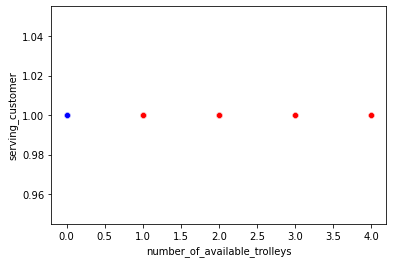

In [ ]:
#Se grafican mapas de dispersión de las 2 variables al respecto a la variable "serving_customer"
from turtle import color
sns.scatterplot(x='number_of_available_trolleys', y='serving_customer', color="blue", data=df)
sns.scatterplot(x='number_of_operators', y='serving_customer', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df1[['number_of_available_trolleys', 'number_of_operators']]
Var_Dep= df1['serving_customer']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_available_trolleys', 'number_of_operators'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.01964985,  0.00304024]),
 '_residues': 73.28669234943341,
 'rank_': 2,
 'singular_': array([17.6094329 , 13.29643006]),
 'intercept_': 0.25807144272960963}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.0011947855647529426

Con lo cual demostramos que no depende cuantos clientes esten siendo atendidos, de los diablitos o los operadores y demostramos que se puede representar gráficamente al igual que se puede modelar